# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

city_name = []
lat = []
lng = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    response = requests.get(base_url + city)
    if response.status_code == 200:
        print(f"Processing Record {cities.index(city) + 1} of {len(cities)} | {city}")
        data = response.json()
        city_name.append(data['name'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temperature.append(data['main']['temp'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
    else:
        print("City not found, skipping")

Processing Record 1 of 611 | pevek
Processing Record 2 of 611 | mataura
Processing Record 3 of 611 | new norfolk
Processing Record 4 of 611 | saskylakh
Processing Record 5 of 611 | yellowknife
Processing Record 6 of 611 | carnarvon
Processing Record 7 of 611 | naze
Processing Record 8 of 611 | chernukha
Processing Record 9 of 611 | butaritari
Processing Record 10 of 611 | geraldton
Processing Record 11 of 611 | saint-philippe
Processing Record 12 of 611 | cape town
Processing Record 13 of 611 | rikitea
Processing Record 14 of 611 | nueva gorgona
Processing Record 15 of 611 | qaanaaq
Processing Record 16 of 611 | ribeira grande
Processing Record 17 of 611 | atuona
Processing Record 18 of 611 | challapata
Processing Record 19 of 611 | thompson
Processing Record 20 of 611 | touros
Processing Record 21 of 611 | odweyne
Processing Record 22 of 611 | dicabisagan
Processing Record 23 of 611 | nikolskoye
Processing Record 24 of 611 | lompoc
Processing Record 25 of 611 | naryan-mar
Processing R

Processing Record 215 of 611 | tuatapere
Processing Record 216 of 611 | port alfred
Processing Record 217 of 611 | georgetown
Processing Record 218 of 611 | sinjai
Processing Record 219 of 611 | bengkulu
Processing Record 220 of 611 | quatre cocos
Processing Record 221 of 611 | husavik
Processing Record 222 of 611 | port elizabeth
Processing Record 223 of 611 | torrington
Processing Record 224 of 611 | shumskiy
Processing Record 225 of 611 | calvinia
Processing Record 226 of 611 | margate
Processing Record 227 of 611 | tocopilla
Processing Record 228 of 611 | whitehorse
Processing Record 229 of 611 | methven
Processing Record 230 of 611 | ayan
City not found, skipping
Processing Record 232 of 611 | santa maria
Processing Record 233 of 611 | la union
Processing Record 234 of 611 | patiya
Processing Record 235 of 611 | longyearbyen
Processing Record 236 of 611 | franklin
Processing Record 237 of 611 | east london
Processing Record 238 of 611 | qui nhon
Processing Record 239 of 611 | meno

Processing Record 423 of 611 | bindki
Processing Record 424 of 611 | komsomolskiy
Processing Record 425 of 611 | sioux lookout
Processing Record 426 of 611 | san ramon
Processing Record 427 of 611 | zhigansk
Processing Record 428 of 611 | rawson
Processing Record 429 of 611 | mecca
Processing Record 430 of 611 | batemans bay
Processing Record 431 of 611 | montepuez
Processing Record 432 of 611 | vangaindrano
Processing Record 433 of 611 | jiujiang
Processing Record 434 of 611 | tsabong
Processing Record 435 of 611 | pinawa
Processing Record 436 of 611 | vuktyl
Processing Record 437 of 611 | lindi
Processing Record 438 of 611 | ucluelet
Processing Record 439 of 611 | lorengau
Processing Record 440 of 611 | lashio
Processing Record 441 of 611 | tutoia
Processing Record 442 of 611 | igrim
Processing Record 443 of 611 | axim
Processing Record 444 of 611 | vanimo
Processing Record 445 of 611 | comodoro rivadavia
Processing Record 446 of 611 | marathon
Processing Record 447 of 611 | mbandaka

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature (F)": temperature,
    "Humidity": humidity,
    "Cloudiness":cloudiness,
    "Wind Speed": wind_speed
})
df.to_csv(output_data_file, header=True, index=False)

In [5]:
df.head()

,City,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed
0,Pevek,69.70,170.31,-0.81,91,29,7.34
1,Mataura,-46.19,168.86,43.30,89,100,4.52
2,New Norfolk,-42.78,147.06,43.61,87,60,2.44
3,Saskylakh,71.92,114.08,8.49,79,0,5.37
4,Yellowknife,62.46,-114.35,23.27,85,90,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# Function to generate a scatter plot against given x and y data series
def generate_plot(x_axis, y_axis, title, xlabel, ylabel, fig_filename):
    fig, ax1 = plt.subplots()
    ax1.scatter(x_axis, y_axis, marker="o")
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    plt.grid()
    plt.savefig(fig_filename)
    plt.show()

#### Latitude vs. Temperature Plot

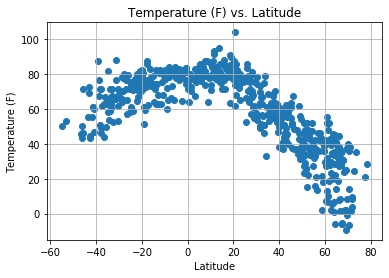

In [7]:
lat_x = df['Latitude']
temp_y = df['Temperature (F)']
generate_plot(lat_x, temp_y, "Temperature (F) vs. Latitude", "Latitude", "Temperature (F)","output_data/Lat_vs_Temp.png")

## CONCLUSION ## 
# This graph shows that temperatures are higher near the equator (0 degree latitude) 
# and they drop as we move farther away from the equator
# Also, cities in Northern hemisphere experience cooler temperatures than cities in southern hemisphere

#### Latitude vs. Humidity Plot

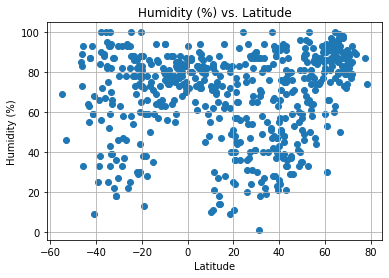

In [8]:
hum_y = df['Humidity']
generate_plot(lat_x, hum_y, "Humidity (%) vs. Latitude", "Latitude", "Humidity (%)","output_data/Lat_vs_Humidity.png")

## CONCLUSION ## 
# This graph shows that the distance from equator has little bearing on the humidity of an area 
# However, more cities in Northern hemisphere experience high levels of humidity 

#### Latitude vs. Cloudiness Plot

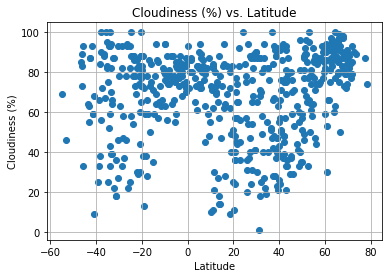

In [9]:
cloud_y = df['Humidity']
generate_plot(lat_x, cloud_y, "Cloudiness (%) vs. Latitude", "Latitude", "Cloudiness (%)","output_data/Lat_vs_Cloudiness.png")

## CONCLUSION ## 
# This graph shows that cloudiness is experienced more as we move farther away from the equator, particularly in the Northern hemisphere

#### Latitude vs. Wind Speed Plot

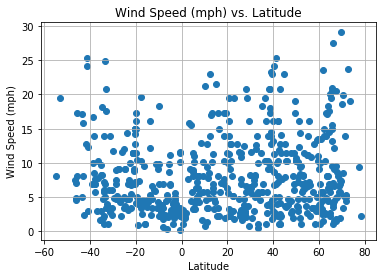

In [10]:
wind_y = df['Wind Speed']
generate_plot(lat_x, wind_y, "Wind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)","output_data/Lat_vs_Wind.png")

## CONCLUSION ## 
# This graph shows that wind speeds are lower near the equator and increase as we move farther away
# Also, majority of the cities experience wind speeds under 20 mph. Only 4 cities in our sample are seeing wind speeds > 25 mph

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def generate_regression_plot(x_axis, y_axis, title, xlabel, ylabel):
    correlation = st.pearsonr(x_axis,y_axis)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-", label=line_eq)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The correlation between {xlabel} and {ylabel} is {round(correlation[0],2)}")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
df_north = df.loc[df['Latitude'] >= 0]
df_south = df.loc[df['Latitude'] < 0]

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

The correlation between Latitude and Temperature (F) is -0.88


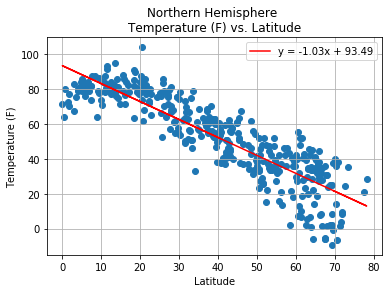

In [13]:
lat_x_north = df_north['Latitude']
temp_y_north = df_north['Temperature (F)']
generate_regression_plot(lat_x_north, temp_y_north, "Northern Hemisphere \nTemperature (F) vs. Latitude", "Latitude", "Temperature (F)")

## CONCLUSION ## 
# In the Northern hemisphere, there is strong negative correlation between latitude and temperature
# which implies that as latitude increases, the temperature drops

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

The correlation between Latitude and Temperature (F) is 0.66


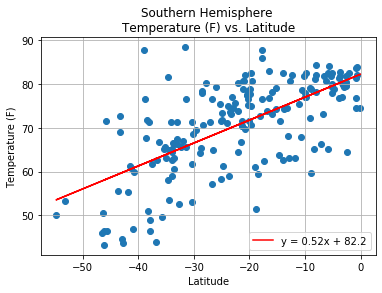

In [14]:
lat_x_south = df_south['Latitude']
temp_y_south = df_south['Temperature (F)']
generate_regression_plot(lat_x_south, temp_y_south, "Southern Hemisphere \nTemperature (F) vs. Latitude", "Latitude", "Temperature (F)")

## CONCLUSION ## 
# In the Souther hemisphere, there is strong positive correlation between latitude and temperature
# which implies that as latitude increases, the temperature also increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity (%) is 0.31


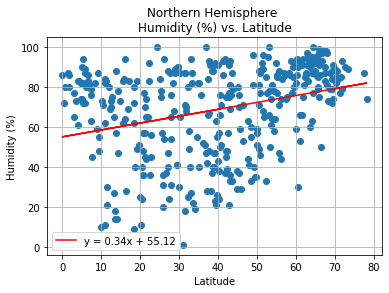

In [15]:
hum_y_north = df_north['Humidity']
generate_regression_plot(lat_x_north, hum_y_north, "Northern Hemisphere \nHumidity (%) vs. Latitude", "Latitude", "Humidity (%)")

## CONCLUSION ## 
# In the Northern hemisphere, there appears to be a weak positive correlation between latitude and humidity
# which implies that as latitude increases, it is likely the humidity will also increase

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity (%) is 0.2


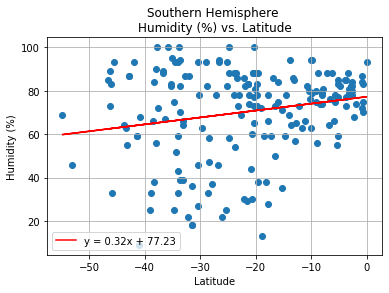

In [16]:
hum_y_south = df_south['Humidity']
generate_regression_plot(lat_x_south, hum_y_south, "Southern Hemisphere \nHumidity (%) vs. Latitude", "Latitude", "Humidity (%)")

## CONCLUSION ## 
# In the Southern hemisphere, there appears to be a weak positive correlation between latitude and humidity
# which implies that as latitude increases, it is likely the humidity will also increase

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness (%) is 0.13


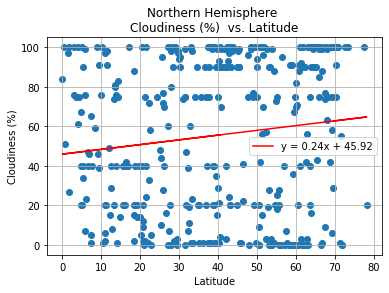

In [17]:
cloud_y_north = df_north['Cloudiness']
generate_regression_plot(lat_x_north, cloud_y_north, "Northern Hemisphere \nCloudiness (%)  vs. Latitude", "Latitude", "Cloudiness (%)")

## CONCLUSION ## 
# In the Northern hemisphere, there appears to be a weak positive correlation between latitude and cloudiness
# which implies that as latitude increases, it is likely the cloudiness will also increase

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness (%) is 0.2


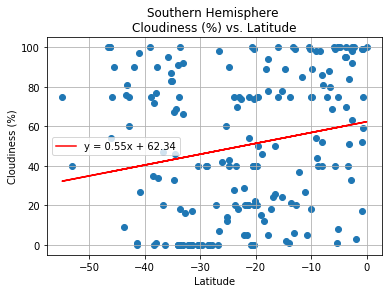

In [18]:
cloud_y_south = df_south['Cloudiness']
generate_regression_plot(lat_x_south, cloud_y_south, "Southern Hemisphere \nCloudiness (%) vs. Latitude", "Latitude", "Cloudiness (%)")

## CONCLUSION ## 
# In the Southern hemisphere, there appears to be a weak positive correlation between latitude and cloudiness
# which implies that as latitude increases, it is likely the cloudiness will also increase

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed (mph) is 0.08


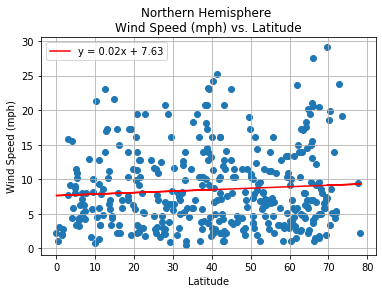

In [19]:
wind_y_north = df_north['Wind Speed']
generate_regression_plot(lat_x_north, wind_y_north, "Northern Hemisphere \nWind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)")

## CONCLUSION ## 
# In the Northern hemisphere, there appears to be no correlation between latitude and wind speed
# which implies the distance of a city from the equator does not necessarily impact the wind speeds that city might experience

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed (mph) is -0.32


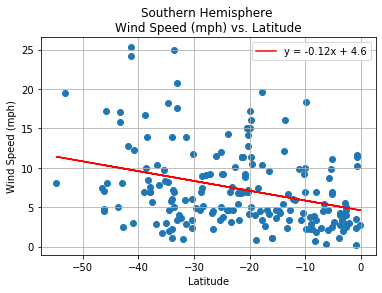

In [20]:
wind_y_south = df_south['Wind Speed']
generate_regression_plot(lat_x_south, wind_y_south, "Southern Hemisphere \nWind Speed (mph) vs. Latitude", "Latitude", "Wind Speed (mph)")

## CONCLUSION ## 
# In the Southern hemisphere, there appears to be a weak negative correlation between latitude and wind speed
# which implies that as latitude increases, it is likely the wind speed will decrease